# Bioduomenų surinkimas ir analizė

## Kolis Nr.5 2023-03-07

Sprendimus siųskite (vardas_pavarde_k5.ipynb; ipynb ir pdf/html formatais)
iki 2023-03-12 23:55 į avoicikas@gmail.com

Įveskite savo vardą ir pavardę

Vertinimas

- Komentarai 25 %
- Programos kodas 25 %
- Grafikai 25 %
- Rezultatas 25 %

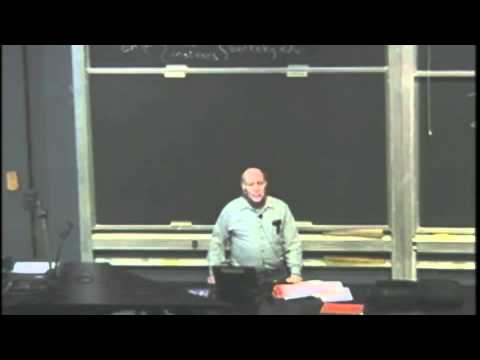

In [1]:
from IPython.display import YouTubeVideo
video = YouTubeVideo(id='hMloyp6NI4E', width=400, height=200, fs=1, autoplay=0)
video

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import seaborn as sns
from scipy import signal
from scipy.fftpack import fft, fftshift
import stockwell as smt
from scipy import stats

---
>> **1. UŽDUOTIS**
>>
>> Duomenyse pateikti seismografo užfiksuoti žemės drebėjimų ir sprogimų signalai.
>>
>> Vizualizuokite ir aprašykite:
>>
>> - Signalo dinamiką: įvykių pradžios ir pabaigos laikai, vyraujantys dažniai
>> - Palyginkite žemės drebėjimus ir sprogimus
>>
>> Duomenys: SprogimaiIrDrebejimai.csv sudarytas iš 16 stulpelių/įrašų. Pirmi 8 stulpeliai yra žemės drebėjimų įrašai. Likusiuose 8 stulpeliuose - sprogimų įrašai. Diskretizacijos dažnis = 2048 Hz
>>

---

In [84]:
#Duomenu isikelimas atskyrimas lenteliu ir col pavadinimu supaprastinimas
data=pd.read_csv("SprogimaiIrDrebejimai.csv")
sf=2048
drebejimai=data.iloc[:,:8]
sprogimai=data.iloc[:,8:19]
sprogimai.columns = ["A", "B", "C","D","E","F","G","L"]
drebejimai.columns = ["A", "B", "C","D","E","F","G","L"]

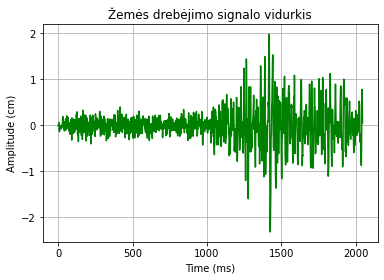

In [85]:
#SUVIDURKINAU DUOMENIS ABIEJU
drebmean=drebejimai.mean(axis=1)
sprogmean=sprogimai.mean(axis=1)
# VIZUALIZACIJA ZEMES DREBEJIMO VIDURKIU
plt.figure()
plt.plot(drebmean,c="g")
plt.grid()
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (cm)')
plt.title('Žemės drebėjimo signalo vidurkis');
#VISO SITO MAN ATRODO NEREIKIA BET PALIEKU NES DARIAU
# PADAROM SPROGIMUI IR DREBEJIMUI FTT
#fftsprog=np.fft.fft(sprogmean)#SITO TURBUT NEREIKIA
#fftdreb=np.fft.fft(drebmean)#SITO TURBUT NEREIKIA
#fftsprog=sprogmean#SITO TURBUT NEREIKIA
#fftdreb=drebmean#SITO TURBUT NEREIKIA
#Vaizdiname grafus
#plt.plot(fftdreb)
#plt.plot(fftsprog)
#pto=np.fft.fft(drebejimai)
#plt.plot(pto)

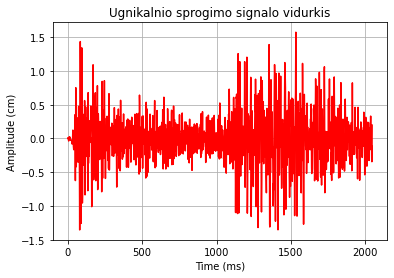

In [86]:
plt.figure()
plt.plot(sprogmean,c="r")
plt.grid()
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (cm)')
plt.title('Ugnikalnio sprogimo signalo vidurkis');

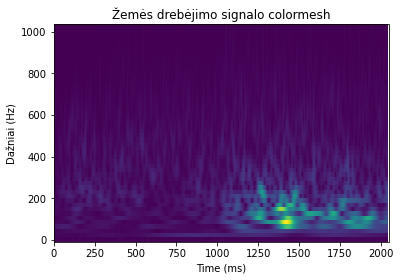

In [87]:
#NUKOPIJUOTA GALIOS MAPA - REIKIA PADARYTI TAI SAVO DUOMENIM IR ATRASTI KUR GELTONA ZONA- TEN DIDZIAUSIA GALIA REISKIA TEN SIGNALAS SVARBIAUSIAS PRASIDEDA IR BAIGHIAS
#ZEMES DREBEJIMAI - LAIKAS DONE
t=np.linspace(0,fftdreb.shape[0]/sf,fftdreb.shape[0])*2047
freq = np.linspace(1, sf/2, 50)
w = 10
widths = w * (sf) / (2 * freq * np.pi)
cwtm = signal.cwt(fftdreb, signal.morlet2, widths, w=w)
plt.figure()
plt.pcolormesh(t, freq, np.abs(cwtm), cmap="viridis", shading='auto');
plt.xlabel('Time (ms)')
plt.ylabel('Dažniai (Hz)')
plt.title("Žemės drebėjimo signalo colormesh");
# VEIKIA - PRADZIOS LAIKAS APIE 100 ir PABAIGOS APIE 1980

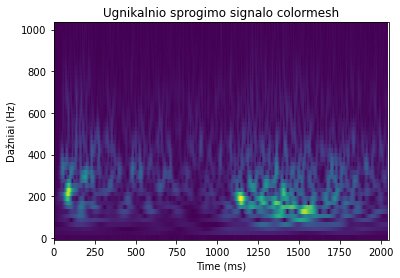

In [88]:
#SPROGIMAI DONE
t=np.linspace(0,fftsprog.shape[0]/sf,fftsprog.shape[0])*2047
freq = np.linspace(1, sf/2, 50)
w = 10
widths = w * (sf) / (2 * freq * np.pi)
cwtm = signal.cwt(fftsprog, signal.morlet2, widths, w=w)
plt.figure()
plt.pcolormesh(t, freq, np.abs(cwtm), cmap="viridis", shading='auto');
plt.xlabel('Time (ms)')
plt.ylabel('Dažniai (Hz)')
plt.title("Ugnikalnio sprogimo signalo colormesh");
# SPROGIMU PRADZIA 1250 PABAIGA 1600 - ILGESNIS  LAIKAS
#SKIRTINGI PRASMINGU SIGNALU ILGIAI 

In [89]:
print("SIGNALU PALYGINIMAS: DAZNIAI - ZEMES DREBEJIMU DAZNIAI yra apie 150-200 Hz, o sprogimu nuo 150-300 Hz.Ugnikalniu sprogimu dazniai didesnes amplitudes")
print("LAIKAS - ZEMES DREBEJIMO NUO 1250 iki 2000 ms, 750 ms, o Sprogimu turi du intervalus 0-100 ms ir 1200-1600 ms")
print("Galime atskirti Žemės drebėjimus ir Ugnikalnio išsiveržimus pagal keletą skirtumų: Žemės drebėjimai trunka apie 300 ms ilgiau negu net sprogimai.")
print("Taip pat sprogimai turi dvi galios viršūnes- signalo pirmas 100 ms ir vėlesnį didesnės dažnių amplitudės peaką 1200-1600, o drebėjimai turi vieną galios viršūnę - apie 1300m nuo signalo pradžios .")


SIGNALU PALYGINIMAS: DAZNIAI - ZEMES DREBEJIMU DAZNIAI yra apie 150-200 Hz, o sprogimu nuo 150-300 Hz.Ugnikalniu sprogimu dazniai didesnes amplitudes
LAIKAS - ZEMES DREBEJIMO NUO 1250 iki 2000 ms, 750 ms, o Sprogimu turi du intervalus 0-100 ms ir 1200-1600 ms
Galime atskirti Žemės drebėjimus ir Ugnikalnio išsiveržimus pagal keletą skirtumų: Žemės drebėjimai trunka apie 300 ms ilgiau negu net sprogimai.
Taip pat sprogimai turi dvi galios viršūnes- signalo pirmas 100 ms ir vėlesnį didesnės dažnių amplitudės peaką 1200-1600, o drebėjimai turi vieną galios viršūnę - apie 1300m nuo signalo pradžios .


---
>> **2. UŽDUOTIS**
>>
>> Paskaitos metu atlikome SSVEP eksperimentą. Buvo pateikti 4 dažnių stimulai (12, 8.57, 6.67, 5.45 Hz) į kuriuos atsitiktine tvarka prašoma koncentruotis.
>>
>> Duomenys pateikti SSVEP direktorijoje.
>>
>> EEG signalai - 5.2 sekundžių atkarpos stimuliacijos metu.
>>
>> Diskretizacijos dažnis 250 Hz. Stulpeliai:
>> - time: laikas sekundėmis aplink stimulą
>> - condition: sąlyga atspindinti stimuliavimo dažnį
>> - epoch: atkarpos numeris
>> - F3, F4, P3, P4, C3, C4, O1, O2: EEG kanalai
>> - Accel..: Akselerometro kanalai
>>
>> ![channels](../K2/chan8.png)
>>
>> Užduotis:
>> - Vizualizuokite atsakus į skirtingus stimulus
>> - Palyginkite atsakus į skirtingus stimulus (Ar galima pasakyti į kurį stimulą koncentruojasi asmuo?)
>>     - Statistinis signalo galios palyginimas stimuliacijos metu ties stimuliacijos/atsako dažniais
>> - Kurie kanalai turi daugiausiai informacijos apie stimulus?
>>
>> Literatūra:
>> - https://en.wikipedia.org/wiki/Steady_state_visually_evoked_potential
>> - https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0191673
>> - [SSVEP apžvalga](../K2/SSVEP.pdf)
>>
---

<AxesSubplot:xlabel='time'>

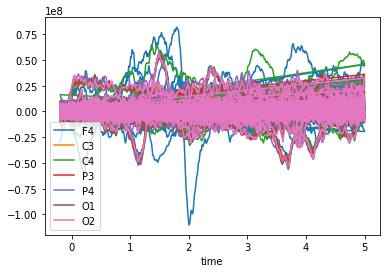

In [192]:
sr= 250
dataa=pd.read_csv(r"C:\Users\taura\Documents\biod2022\exam\K5\SSVEP\20230228_1211-sub-02_ssvep_Collect4Target_eeg_controller_4target-raw.csv",index_col=1)
#Sitas eilutes palikau komentaruose del paprastesnio duomenu apzvelgimo bet visas kodas pilnai veikia suliejus visus duomenis
#datab=pd.read_csv(r"C:\Users\taura\Documents\biod2022\exam\K5\SSVEP\20230228_1238-sub-03_ssvep_Collect4Target_eeg_controller_4target-raw.csv",index_col=1)
#datac=pd.read_csv(r"C:\Users\taura\Documents\biod2022\exam\K5\SSVEP\20230228_1300-sub-01_ssvep_Collect4Target_eeg_controller_4target-raw.csv",index_col=1)
#dataa=pd.concat([dataa, datab,datac], axis=0)
dataa.groupby(['condition', 'epoch'])[(['F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2'])]
#dataa=dataa[['F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2']]
#d2=dataa.groupby(['condition', 'epoch'])[('F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2')]
#dataa=dataa[['F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2']]
dataa["average"]=dataa[['F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2']].mean(axis=1)
#p.plot(subplots=True)
# GAVOME VISU DAZNIU VISUS SIGNALUS -  F3 duomenys blogi.
HZ12=dataa[dataa["condition"]== 12.0].iloc[:,4:11]
HZ857=dataa[dataa["condition"]== 8.57].iloc[:,4:11]
HZ667=dataa[dataa["condition"]== 6.67].iloc[:,4:11]
HZ545=dataa[dataa["condition"]== 5.45].iloc[:,4:11]
#Gerai gauta manau vidurkiai kanalu pagal epochas
################################F3 duomenys blogi.
dataa.iloc[:,4:11].plot()

<Figure size 432x288 with 0 Axes>

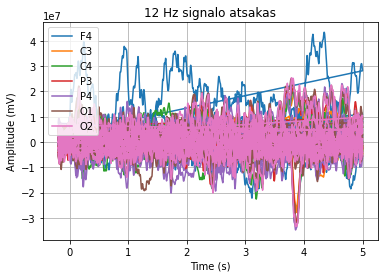

<Figure size 432x288 with 0 Axes>

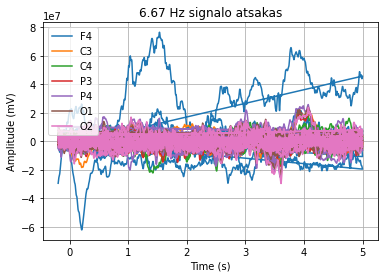

<Figure size 432x288 with 0 Axes>

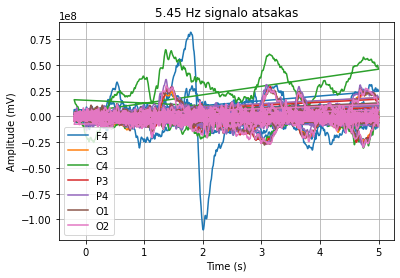

<Figure size 432x288 with 0 Axes>

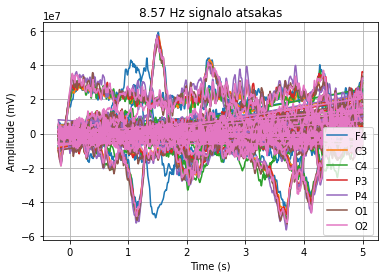

In [193]:
#Vizualizuokite atsakus į skirtingus stimulus
#
plt.figure()
HZ12.plot()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title("12 Hz signalo atsakas");
plt.grid()
plt.show()
#
plt.figure()
HZ667.plot()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title("6.67 Hz signalo atsakas");
plt.grid()
plt.show()
#
plt.figure()
HZ545.plot()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title("5.45 Hz signalo atsakas");
plt.grid()
plt.show()
#
plt.figure()
HZ857.plot()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.grid()
plt.title("8.57 Hz signalo atsakas");
plt.show()
#Baigta Vizualizacija signalo!

Pagal musu daznine analize matome kad galima nustatyti i kurio daznio stimula reaguoja bandomasis pagal atsako daznine charakteristika
12 Hz - apie 22 Hz atsakas ,8.57 Hz -apie 55-60 Hz atsakas ,6.67 Hz-apie 5-15 Hz atsakas,5.45 Hz- apie 35 Hz atsakas.


<Figure size 432x288 with 0 Axes>

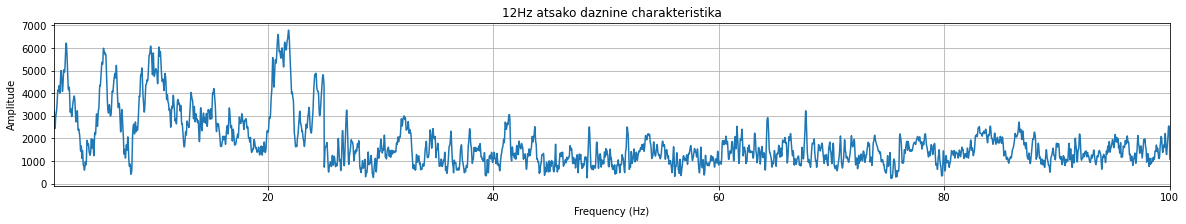

<Figure size 432x288 with 0 Axes>

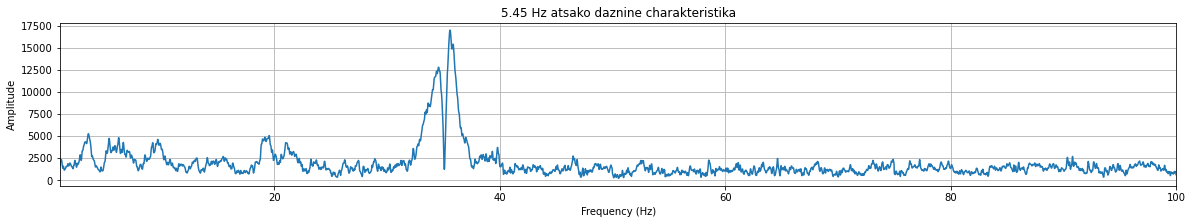

<Figure size 432x288 with 0 Axes>

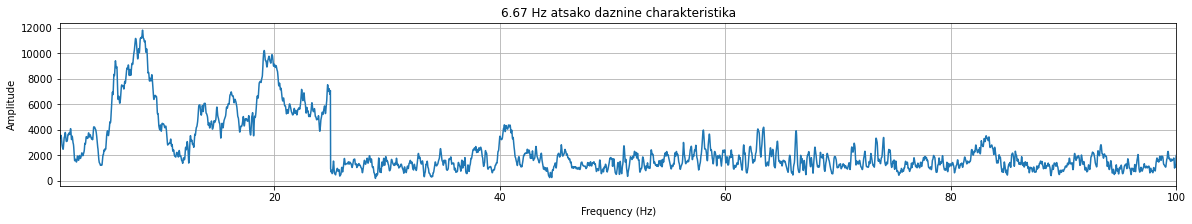

<Figure size 432x288 with 0 Axes>

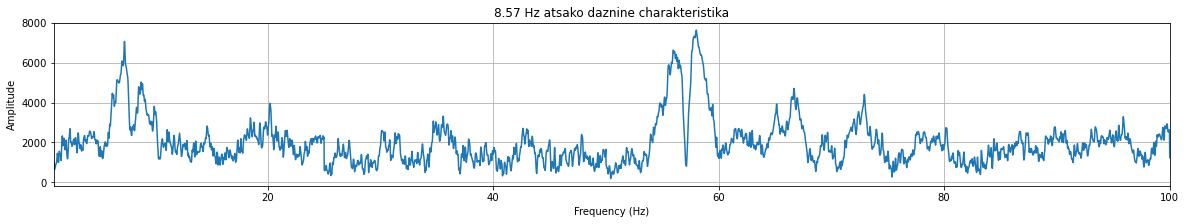

In [194]:
#DAROM DAZNIU ANALIZE  FFT
plt.figure()
HZ12ff=pd.DataFrame(np.fft.fft(HZ12))
x_fft_avg = np.mean(abs(np.array(HZ12ff)), axis=1)
n = HZ12ff[0].size
timestep = 1/sr
freq = np.fft.fftfreq(n, d=timestep)
fig = plt.figure(figsize=(20, 3))
plt.plot(freq[0:n//2], 2.0/len(x_fft_avg) * abs(x_fft_avg[0:len(x_fft_avg)//2]))
plt.xlim(1,100)
plt.grid()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude");
plt.title("12Hz atsako daznine charakteristika")
####
plt.figure()
HZ545ff=pd.DataFrame(np.fft.fft(HZ545))
x_fft_avg = np.mean(abs(np.array(HZ545ff)), axis=1)
n = HZ545ff[0].size
timestep = 1/sr
freq = np.fft.fftfreq(n, d=timestep)
fig = plt.figure(figsize=(20, 3))
plt.plot(freq[0:n//2], 2.0/len(x_fft_avg) * abs(x_fft_avg[0:len(x_fft_avg)//2]))
plt.xlim(1,100)
plt.grid()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude");
plt.title("5.45 Hz atsako daznine charakteristika")
#
plt.figure()
HZ667ff=pd.DataFrame(np.fft.fft(HZ667))
x_fft_avg = np.mean(abs(np.array(HZ667ff)), axis=1)
n = HZ667ff[0].size
timestep = 1/sr
freq = np.fft.fftfreq(n, d=timestep)
fig = plt.figure(figsize=(20, 3))
plt.plot(freq[0:n//2], 2.0/len(x_fft_avg) * abs(x_fft_avg[0:len(x_fft_avg)//2]))
plt.xlim(1,100)
plt.grid()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude");
plt.title("6.67 Hz atsako daznine charakteristika")
#
plt.figure()
HZ857ff=pd.DataFrame(np.fft.fft(HZ857))
x_fft_avg = np.mean(abs(np.array(HZ857ff)), axis=1)
n = HZ857ff[0].size
timestep = 1/sr
freq = np.fft.fftfreq(n, d=timestep)
fig = plt.figure(figsize=(20, 3))
plt.plot(freq[0:n//2], 2.0/len(x_fft_avg) * abs(x_fft_avg[0:len(x_fft_avg)//2]))
plt.xlim(1,100)
plt.grid()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude");
plt.title("8.57 Hz atsako daznine charakteristika")
print("Pagal musu daznine analize matome kad galima nustatyti i kurio daznio stimula reaguoja bandomasis pagal atsako daznine charakteristika")
print("12 Hz - apie 22 Hz atsakas ,8.57 Hz -apie 55-60 Hz atsakas ,6.67 Hz-apie 5-15 Hz atsakas,5.45 Hz- apie 35 Hz atsakas.")

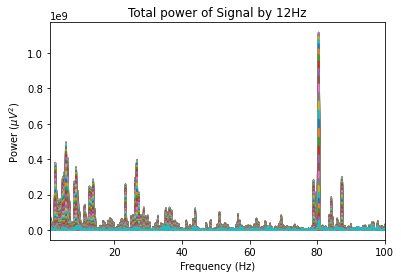

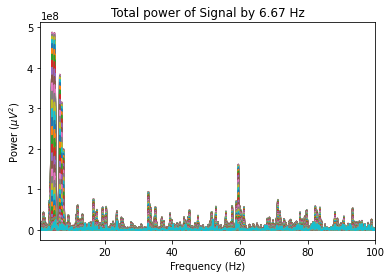

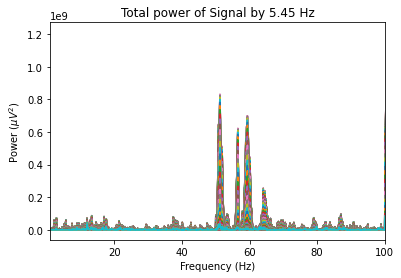

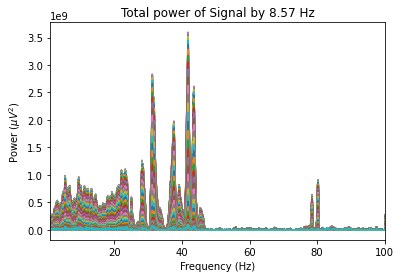

In [195]:
#Daznines charakteristikos galios grafikai
plt.figure()
A = []
A.append(np.abs(np.fft.fft(HZ12, sr) / (len(HZ12)/2.0))
)
A = np.mean(A, axis=0)
freq = np.linspace(sr//2*-1, sr//2, len(A))*-1
response = fftshift(A)**2
plt.plot(freq, response)
plt.title("Total power of Signal by 12Hz")
plt.ylabel("Power ($\mu V^2$)");
plt.xlabel("Frequency (Hz)");
plt.xlim(1,100)
#
plt.figure()
A = []
A.append(np.abs(np.fft.fft(HZ667, sr) / (len(HZ667)/2.0))
)
A = np.mean(A, axis=0)
freq = np.linspace(sr//2*-1, sr//2, len(A))*-1
response = fftshift(A)**2
plt.plot(freq, response)
plt.title("Total power of Signal by 6.67 Hz")
plt.ylabel("Power ($\mu V^2$)");
plt.xlabel("Frequency (Hz)");
plt.xlim(1,100)
##
plt.figure()
A = []
A.append(np.abs(np.fft.fft(HZ545, sr) / (len(HZ545)/2.0))
)
A = np.mean(A, axis=0)
freq = np.linspace(sr//2*-1, sr//2, len(A))*-1
response = fftshift(A)**2
plt.plot(freq, response)
plt.title("Total power of Signal by 5.45 Hz")
plt.ylabel("Power ($\mu V^2$)");
plt.xlabel("Frequency (Hz)");
plt.xlim(1,100)
#
plt.figure()
A = []
A.append(np.abs(np.fft.fft(HZ857, sr) / (len(HZ857)/2.0))
)
A = np.mean(A, axis=0)
freq = np.linspace(sr//2*-1, sr//2, len(A))*-1
response = fftshift(A)**2
plt.plot(freq, response)
plt.title("Total power of Signal by 8.57 Hz")
plt.xlim(1,100)
plt.ylabel("Power ($\mu V^2$)");
plt.xlabel("Frequency (Hz)");

In [196]:
##Kurie kanalai turi daugiausiai informacijos apie stimulus?
print("Pagal signalo atsaka - patys svarbiausi kanalai yra F4,C4 ir Q2")


Pagal signalo atsaka - patys svarbiausi kanalai yra F4,C4 ir Q2


---
>> **3. UŽDUOTIS**
>>
>> Užfiksuotas žiurkės smegenų atsakas į 200 kartų pakartotą garsą.
>>
>> Vizualizuokite ir nustatykite:
>> - Stimulo ir atsako į jį parametrus (trukmė, dažnis)
>> - Apskaičiuokite ir vizualizuokite vidutinę atsako stiprumo kreivę (+- 2Hz) stimuliavimo metu
>> - Palyginkite galios ir fazės sutapimo indekso laiko-dažnių algoritmų gautas atsako kreives.
>> - Laiką ir dažnį maksimalaus atsako (kaip jis kinta pritaikius skirtingas bazinės linijos korekcijas)
>>
>> ![semiAts](ats_pvz.png)
>>
>> Duomenys: ecog.csv Diskretizacijos dažnis 1000 Hz
>>

---

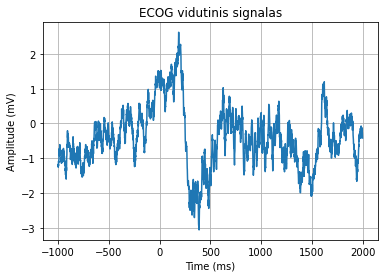

In [197]:
# VIZUALIZUOJAM STIMULA, PASKAICIUOJAME GALIA IR FAZE,  LYGINAME JU KREIVES KAIP LABORE
sf=1000
rat=pd.read_csv("ecog.csv")
rat=rat.drop(columns=['index'])
rat=rat[["time","signal","epoch"]]
#Geras rat signalas meanas su kuriuos dirbt
#ratvar=rat.groupby("time")["signal"]
ratfin=rat.groupby("time")["signal"].mean()
plt.figure()
plt.plot(ratfin)
plt.title("ECOG vidutinis signalas")
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (mV)')
plt.grid()
plt.show()


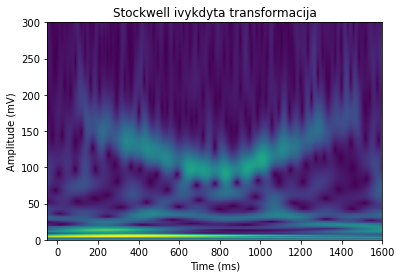

Signalo trukme 1000 ms - 1 s, Daznio diapazonas nuo 100-120 HZ


In [198]:
#STOCKWELLO TEISINGAS OUTPUTAS- SU SITUO ZAISTI ATSAKOM I KLAUSIMA KAS SIGNALO DAZNIS IR TRUKME
s_transfrm = smt.st.st(ratfin)
plt.pcolormesh(
    ratfin.index,
    np.arange(0, len(ratfin) / 2 , 1),
    np.abs(s_transfrm),
    cmap="viridis",
    shading='nearest');
#SU xlim ir ylim iskerpame mums aktualia dali duomenu
plt.xlim([-50, 1600])
plt.ylim([0,300])
plt.title("Stockwell ivykdyta transformacija")
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (mV)')
plt.show()
print("Signalo trukme 1000 ms - 1 s, Daznio diapazonas nuo 100-120 HZ")


C:\Users\taura\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


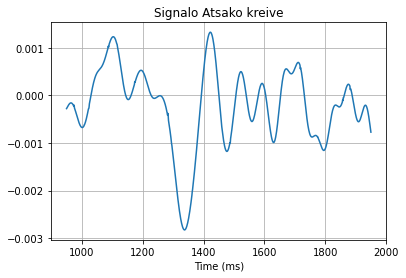

In [199]:

#Atsako Kreive kuria gauname is stockwello transformacijos
ab1=pd.DataFrame(s_transfrm).T
ab1=ab1.loc[950:1950,80:150] # Mums reikalinga (pries tai pazymeta geltona zona iskerpame duomenyse)
ab=ab1.mask(np.abs(ab1) < 0.004, 0)# Uzmaskuojame absoliutines vertes paversdami nereiksmingas vertes i 0 kad vesdami vidurki gautume tik reiksmingu reiksmiu vidurki.
ab[ab == 0] = np.nan
means = (np.mean(ab, axis=1))
plt.title("Signalo Atsako kreive")
plt.xlabel('Time (ms)')
plt.grid()
plt.plot(means)

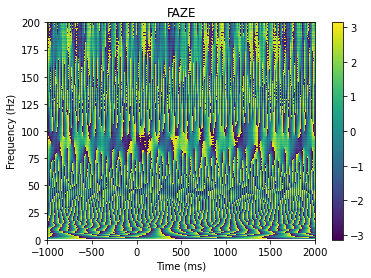

In [200]:
#FAZE
sample_rate= 1000
phase = []
dt = 1/sample_rate
freq = np.linspace(1, sample_rate//2, sample_rate//2)
w = 15
widths = w * (1 / dt) / (2 * freq * np.pi)
time= ratfin.index
res = signal.cwt(ratfin, signal.morlet2, widths, w=w)
phase.append(res)
phase = np.mean(np.angle(phase), axis=0)
########## 
plt.pcolormesh(time, freq, phase, cmap='viridis', shading='auto')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
plt.title("FAZE")
#FAZES GRAFIKAS LAIKO DINAMIKOJE
plt.ylim([0, 200])
plt.colorbar();
#Norėdami gauti laiko dinamiką naudojame vieną iš laiko-dažnių algoritmų. MANAU TAI

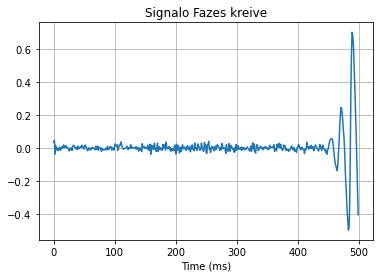

In [201]:
phase=pd.DataFrame(phase)
phase
bb=phase.mask(np.abs(phase) < 0, 0)# Kartojame pries tai naudota procesa norint gauti fazes kreive !
phase[phase == 0] = np.nan
meansb = np.nanmean(phase, axis=1)
plt.plot(meansb)
plt.title("Signalo Fazes kreive")
plt.xlabel('Time (ms)')
plt.grid()
#FAZES KREIVE